In [40]:
import pandas as pd

df = pd.read_csv("../../membershipchainservice/Data/comparison_join_working.txt")
df["processed_time"] = pd.to_timedelta(df["Time"]).apply(lambda x: x.total_seconds())
df
max_time = max(df["processed_time"])

In [70]:
order_categ = ["Wants","Don't Manage", "Manage", "Manage Normally"]
nodes = list(df["Name"].unique())
print(order_categ)
dataset = []
d_wo = []
for n in nodes:
    df_filtered = df[df["Name"] == n][df["Registration"].isin(order_categ)].filter(items=["Registration", "processed_time"])
    df_dict = {r[1][0] : r[1][1] for r in df_filtered.iterrows()}
    
    vals = [df_dict.get(o,0) for o in order_categ]
    
    values= []
    wo = []
    display(df_filtered)
    print(n,len(df_dict))
    
    if len(df_dict) == 1:
        values = [0,0, 0, max_time]
        wo = [0,0, 0, max_time]
    elif len(df_dict) == 2: 
        values = [vals[0], vals[2]-vals[0],0, max_time-vals[2]]
        wo = [vals[0],max_time-vals[0],0,0]
    elif len(df_dict) == 3:
        values = [vals[0], vals[1]-vals[0], vals[3]-vals[1], max_time-vals[3]]
        wo = [vals[0],max_time-vals[0],0,0]
    else:
        values = vals
        wo = vals
            
    values.append(n)
    wo.append(n)
    dataset.append(values)
    d_wo.append(wo)


df_bars_control_plane = pd.DataFrame(dataset, columns=["Enter", "Wait", "Refused", "Accepted", "Name"])
df_bars_wo_control_plane = pd.DataFrame(d_wo, columns=["Enter", "Wait", "Refused", "Accepted", "Name"])

['Wants', "Don't Manage", 'Manage', 'Manage Normally']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Registration,processed_time
0,Manage Normally,0.0


node_0 1


,Registration,processed_time
1,Manage Normally,0.0


node_1 1


,Registration,processed_time
2,Manage Normally,0.0


node_2 1


,Registration,processed_time
3,Manage Normally,0.0


node_3 1


,Registration,processed_time
5,Wants,1.506673
6,Manage,1.527704


node_4 2


,Registration,processed_time
7,Wants,2.505852
8,Manage,2.526977


node_5 2


,Registration,processed_time
10,Wants,10.625687
11,Don't Manage,10.626685
13,Manage Normally,14.073754


node_6 3


,Registration,processed_time
15,Wants,24.685836
16,Don't Manage,24.686723
18,Manage Normally,28.097078


node_7 3


,Registration,processed_time
20,Wants,37.681826
21,Manage,37.717440


node_8 2


,Registration,processed_time
22,Wants,39.681721
23,Don't Manage,39.682867
25,Manage Normally,42.167131


node_9 3


,Registration,processed_time
26,Wants,42.750172
27,Manage,42.787348


node_10 2


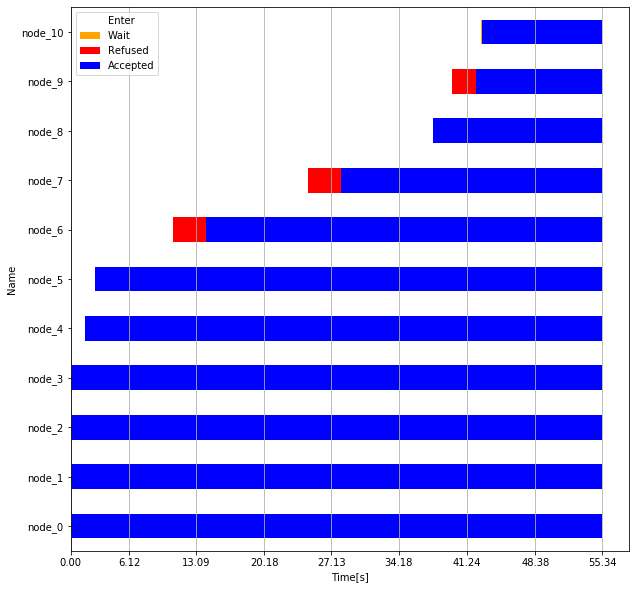

In [79]:
size=10

ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])

ax = df_bars_control_plane.set_index("Name").plot.barh(stacked=True,
                                                        figsize=(size, size),
                                                        xticks=ticks,
                                                        color=["white", "orange", "red", "blue"]
                                                       )
ax.set_xlabel("Time[s]")
ax.grid(axis="x")
ax.legend(loc="upper left")
fig = ax.get_figure()
fig.savefig('JoinWithControlPlane.pdf')

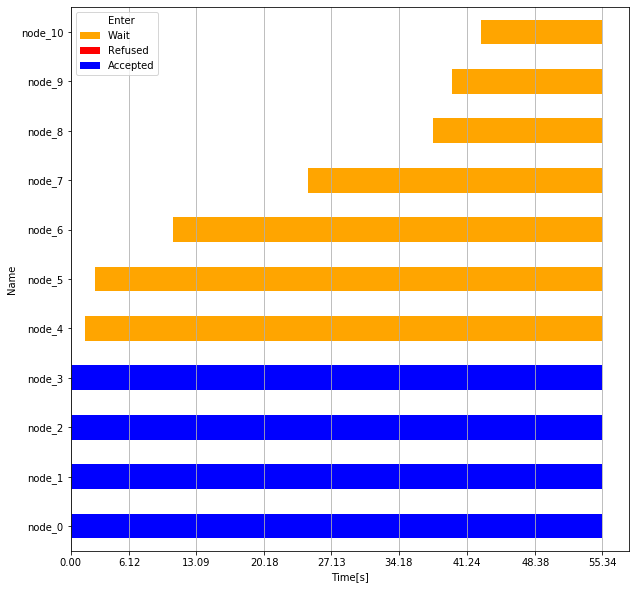

In [81]:
size=10

ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])

ax = df_bars_wo_control_plane.set_index("Name").plot.barh(stacked=True,
                                                        figsize=(size, size),
                                                        xticks=ticks,
                                                        color=["white", "orange", "red", "blue"], 
                            
                                                       )
ax.set_xlabel("Time[s]")
ax.grid(axis="x")
ax.legend(loc="upper left")
fig = ax.get_figure()
fig.savefig('JoinWithoutControlPlane.pdf')